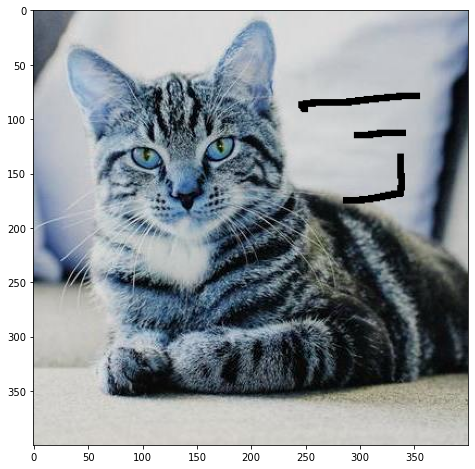

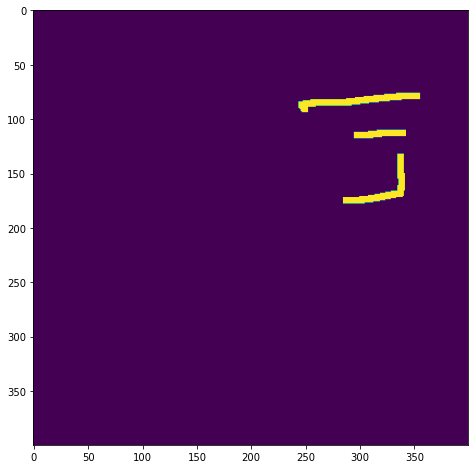

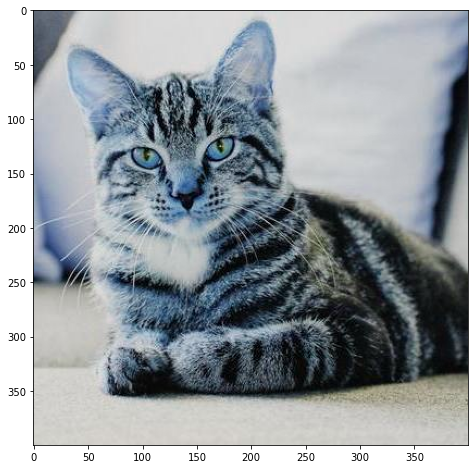

In [33]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
img=cv2.imread("dimage_damaged.png")
plt.imshow(img)
plt.show()
mask=cv2.imread("dimage_mask.png",0)
plt.imshow(mask)
plt.show()
dst=cv2.inpaint(img,mask,3,cv2.INPAINT_TELEA)
cv2.imwrite("dimage_inpainted.png",dst)
plt.imshow(dst)
plt.show()


In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.figsize']=(10,8)





In [35]:
def show_image(image,title='Image',cmap_type='gray'):
    plt.imshow(image,cmap=cmap_type)
    plt.title(title)
    plt.axis('off') 
    
def plot_comparison(img_original,img_filtered,img_title_filtered):
    fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(10,8),sharex=True,sharey=True)
    ax1.imshow(img_original,cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(img_filtered,cmap=plt.cm.gray)
    ax2.set_title('img_title_filtered')
    ax2.axis('off')
    

In [36]:
from skimage.restoration import inpaint
from skimage.transform import resize
from skimage import color


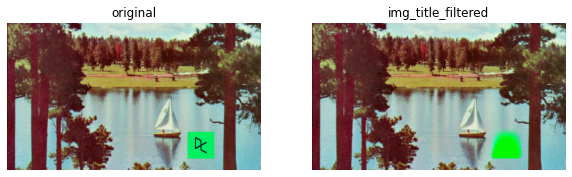

In [37]:
image_with_logo=plt.imread('imlogo.png')
mask=np.zeros(image_with_logo.shape[:-1])
mask[210:272,360:425]=1
image_logo_removed=inpaint.inpaint_biharmonic(image_with_logo,mask,multichannel=True)
plot_comparison(image_with_logo,image_logo_removed,'Image with logo removed')


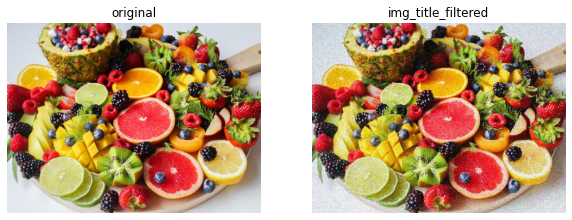

In [38]:
from skimage.util import random_noise
fruit_image=plt.imread('fruitts.jpeg')
noisy_image=random_noise(fruit_image)
plot_comparison(fruit_image,noisy_image,'noisy image')


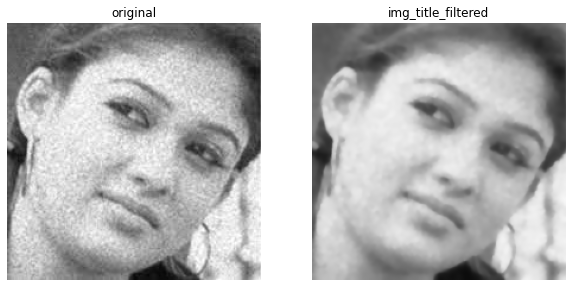

In [41]:
from skimage.restoration import denoise_tv_chambolle
noisy_image=plt.imread('noisy.jpg')
denoised_image=denoise_tv_chambolle(noisy_image,multichannel=True)
plot_comparison(noisy_image,denoised_image,'denoised Image')

<ipython-input-18-5be23d80a3bb>:5: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments=slic(face_image,n_segments=400)
<ipython-input-18-5be23d80a3bb>:7: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  segmented_image=label2rgb(segments,face_image,kind='avg')


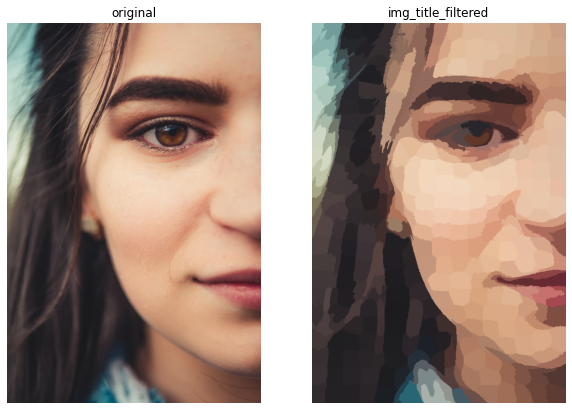

In [18]:
from skimage.segmentation import slic
from skimage.color import label2rgb

face_image=plt.imread('face.jpg')
segments=slic(face_image,n_segments=400)

segmented_image=label2rgb(segments,face_image,kind='avg')
plot_comparison(face_image,segmented_image,'segmented image,400 superpixels')


In [25]:
def show_image_contour(image,contours):
    plt.figure()
    for n,contour in enumerate(contours):
        plt.plot(contour[:,1],contour[:,0],linewidth=3)
    plt.imshow(image,interpolation='nearest',cmap='gray_r')
    plt.title('Contours')
    plt.axis('off')
    

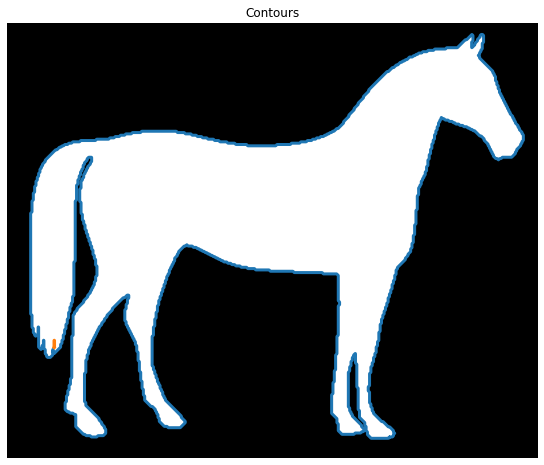

In [27]:
from skimage import measure,data

horse_image=data.horse()
contour=measure.find_contours(horse_image,level=0.8)
show_image_contour(horse_image,contour)

<ipython-input-28-0de4c7782b1e>:7: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  image_dices = color.rgb2gray(image_dices)


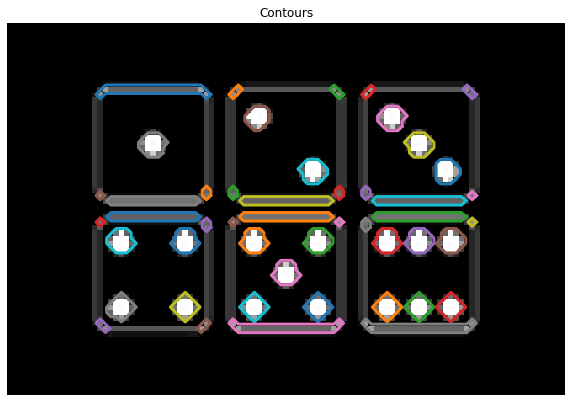

In [28]:
from skimage.io import imread 
from skimage.filters import threshold_otsu

image_dices = imread('diceimg.png')

# Make the image grayscale
image_dices = color.rgb2gray(image_dices)

#Obtain the optimal thresh value 
thresh = threshold_otsu(image_dices)

# Apply thresholding
binary=image_dices > thresh

# Find contours at a constant value of 0.8
contours = measure.find_contours (binary, level=0.8)

# Show the image
show_image_contour (image_dices, contours)


dices dots number:48.


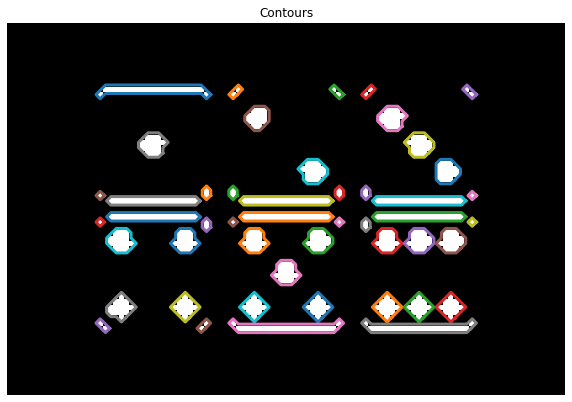

In [29]:
shape_contours=[cnt.shape[0] for cnt in contours]
max_dots_shape=50
dots_contours=[cnt for cnt in contours if np.shape(cnt)[0]<max_dots_shape]
show_image_contour(binary,contours)
print('dices dots number:{}.'.format(len(dots_contours)))


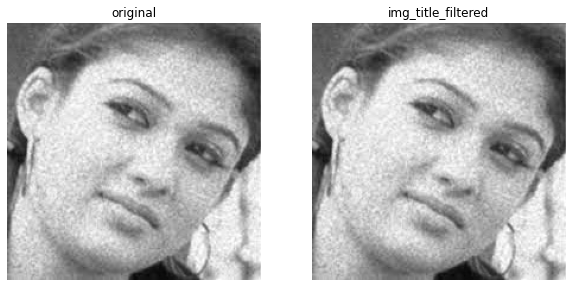

In [43]:
from skimage.restoration import denoise_bilateral
landscape_image=plt.imread('noisy.jpg')
denoised_image=denoise_bilateral(landscape_image,multichannel=True)
plot_comparison(landscape_image,denoised_image,'denoised Image')